In [233]:
#conda install -c conda-forge scikit-allel
import pandas as pd
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
#deletions for this project are across seven inbred mouse strains; underscore used in place of /
strain=['AKR_J','A_J','BALB_CJ','C3H_HeJ','CBA_J','DBA_2J','LP_J']

In [235]:
df_current = pd.DataFrame(columns=['strain','length'])
df = pd.DataFrame(columns=['strain','length'])


for s in strain:
    file='../gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'strain': s, 'length': callset['variants/SVLEN']})
    df = pd.concat([df_current, df],ignore_index=True)

In [236]:
df['length']=pd.to_numeric(df['length'])

In [237]:
df.to_csv('../analysis_files/true_length_7_strains.csv',index=False)

# Figure 1a

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

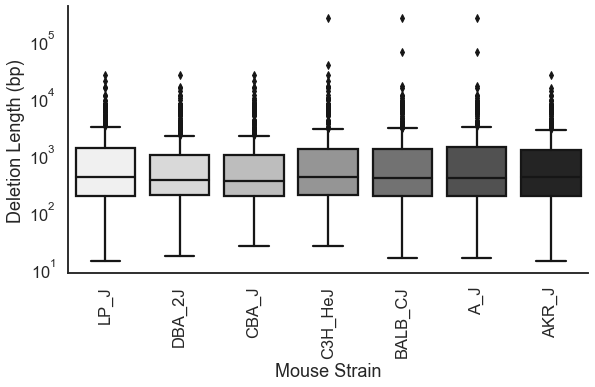

In [238]:
#average deletion length by mouse strain
fig1a=sns.set_style("white")
fig1a=sns.set_context("talk")
fig1a = sns.catplot(x="strain", y="length",kind='box',data=df, aspect=1.8,palette="Greys")
fig1a.set(yscale="log");
fig1a.set(xlabel='Mouse Strain', ylabel='Deletion Length (bp)')
fig1a=sns.despine()
plt.xticks(rotation=90)


In [239]:
count_row = df.shape[0]
print ("Number of SVs for 7 strains:",count_row)

Number of SVs for 7 strains: 3799


In [240]:
print ("Max deletion length")
df.max()

Max deletion length


strain      LP_J
length    239572
dtype: object

In [241]:
print (df.mean(),df.std())

length    1633.024217
dtype: float64 length    7285.812215
dtype: float64


In [242]:
deletions_per_strain=df.groupby(['strain']).count()
deletions_per_strain=deletions_per_strain.rename(columns={"length": "n", "B": "c"})
deletions_per_strain.head()
deletions_per_strain.to_csv('../analysis_files/SV_deletions_per_strain.csv')
print(deletions_per_strain.mean(),deletions_per_strain.std())

n    542.714286
dtype: float64 n    43.675753
dtype: float64


In [243]:
df_50_100=df.loc[(df['length'] > 50) & (df['length'] <= 100)]
df_100_500=df.loc[(df['length'] > 100) & (df['length'] <= 500)]
df_500_1000=df.loc[(df['length'] > 500) & (df['length'] <=1000)]
df_1000=df.loc[(df['length'] >1000)]

In [244]:
count_row_50_100 = df_50_100.shape[0]
count_row_100_500 = df_100_500.shape[0]
count_row_500_1000 = df_500_1000.shape[0]
count_row_1000 = df_1000.shape[0]

f=open('../analysis_files/true_number_SVs_by_category.csv','w')
f.write("cat,n")
f.write("\n")
f.write('50-100,'+str(count_row_50_100))
f.write("\n")
f.write('100-500,'+str(count_row_100_500))
f.write("\n")
f.write('500-1000,'+str(count_row_500_1000))
f.write("\n")
f.write('>1000,'+str(count_row_1000))
f.write("\n")
f.close()

In [245]:
df_cat=pd.read_csv('../analysis_files/true_number_SVs_by_category.csv')
df_cat['precision']=(df_cat['n']/3710)*100
df_cat.head()

,cat,n,precision
0,50-100,255,6.873315
1,100-500,1857,50.053908
2,500-1000,562,15.148248
3,>1000,1036,27.924528


In [246]:
strain=['AKR_J','A_J','BALB_CJ','C3H_HeJ','CBA_J','DBA_2J','LP_J']

#temporarily removed popdel since there are no files
tools=['breakdancer',
'clever',
'delly',
'gasv',
'gridss',
'indelminer',
'lumpexpress',
'mistrvar',
'pindel',
'platypus',
'rdxplorer',
'smoove',
'sniffles',
'spiral_pcmpdeletions']

In [247]:
#tool detection of deletions
df_current = pd.DataFrame(columns=['strain','length'])
df = pd.DataFrame(columns=['tool','strain','length'])

#0t.sniffles.LP_J_chr19.100p_sorted.modified.vcf
for s in strain:
    for t in tools:
        file='../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.'+t+'.'+s+'.chr19.100p_sorted.modified.vcf'
        
        callset = allel.read_vcf(file,fields='*')
        # print(type(callset))
        
        if callset:
            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN']})
            #print(df_current)
        
            df = pd.concat([df_current, df],ignore_index=True)
        else:
            print("Empty File: " + file)
            
#missing files for all strains for tools popdel and spiral_pcmpdeletions as well as pindel.BALB_CJ and platypus.BALB_CJ

/Users/angelalu/opt/anaconda3/lib/python3.7/site-packages/allel/io/vcf_read.py:1745: UserWarning: multiple INFO headers for 'SVLEN'
  warnings.warn('multiple INFO headers for %r' % k)


Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.AKR_J.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.A_J.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.pindel.BALB_CJ.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.platypus.BALB_CJ.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.BALB_CJ.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.C3H_HeJ.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.CBA_J.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.DBA_2J.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/nf_0t.spiral_pcmpdeletions.LP_

In [248]:
#true/gold standard detection of deletions
df_current = pd.DataFrame(columns=['strain','length'])


for s in strain:
    file='../gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'tool': 'true', 'strain': s, 'length': callset['variants/SVLEN']})
    df = pd.concat([df_current, df],ignore_index=True)

In [249]:
df['length']=pd.to_numeric(df['length'])
df = df[df['length']>=50]

# Figure 1b

In [250]:
df_number=df.groupby('tool', as_index=False).count()
del df_number['strain']
df_number=df_number.rename(columns={"length": "n"})

df_number

,tool,n
0,breakdancer,3542
1,clever,12773
2,delly,3910
3,gasv,82225
4,gridss,4084
5,indelminer,899
6,lumpexpress,3115
7,mistrvar,1943
8,pindel,57046
9,platypus,6


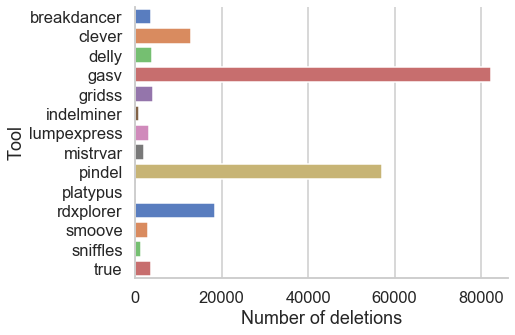

In [268]:
#number of deletions detected by each tool
fig1b=sns.set_style("whitegrid")
fig1b=sns.set_context("talk")
fig1b = sns.catplot(x="n", y="tool",data=df_number,kind='bar',aspect=1.5, palette="muted")
fig1b.set(xlabel='Number of deletions', ylabel='Tool')
#fig1b.set(xscale="log");
fig1b=sns.despine()

# Figure 1g

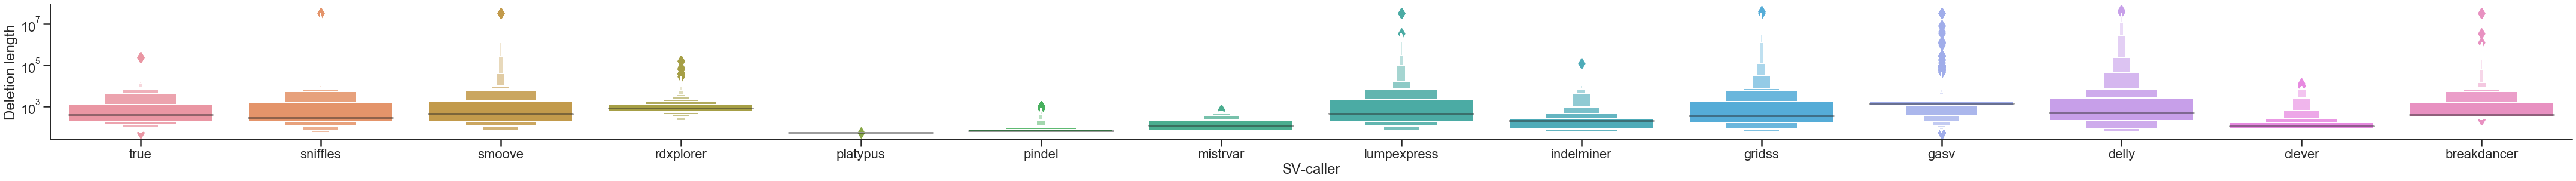

In [260]:
#graph is missing popdel and spiral_pcmpdeletions due to lack of files
fig1g=sns.set_style("ticks")
fig1g=sns.set_context("poster")
fig1g = sns.catplot(x="tool", y="length",kind='boxen',data=df, aspect=12)
fig1g.set(yscale="log");
fig1g.set(xlabel='SV-caller', ylabel='Deletion length')
fig1g=sns.despine()
